# Assignment 3
<br/>
#### Jaime Guevara
#### Spring '19
#### CS 497

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score # so I don't have to call this later on

In [2]:
data = pd.read_csv("clean_housing_data.csv") ##Load your dataset from Assignment 2
X = data.drop(["SalePrice", "Unnamed: 0", "Unnamed: 0.1", "YearBuilt"], axis=1) #Drop any columns you will not use as features
y = data["SalePrice"]

In [3]:
# Normalize features (if they aren't already)
lambda_func = lambda x: (x - x.mean())/x.std()
numerical_features = ["FullBath", "BedroomAbvGr", "TotRmsAbvGrd", "GarageCars"]
X[numerical_features] = X[numerical_features].transform(lambda_func)
#y = y.transform(lambda_func) 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) # Setting our test and train sets

To be super-clear on what is happening we will start with a non-vectorized implementation. We are going to split linear regression into a few helper functions. One function, forward_pass_one_step will calculate a prediction for a given value of parameters. Another function, gradient_descent_one_step, will update parameters for the next iteration. We'll also include a function to calculate and store the error term. Then we will loop through these functions for many iterations to find the optimal value sof our parameters, W.

In [5]:
def gradient_descent_one_step(y, y_pred, X, w, learning_rate, b):
    #y is vector of labels for examples
    #X is the features of the examples
    #W is a vector of the current values of the weights 
    n = X.shape[1] #number of features
    m = X.shape[0] #number of examples

    w_new = np.zeros(np.shape(w))
    dj_dw = np.zeros(np.shape(w))
    dj_db = 0

    #Loop through examples in training set
    for i in range(m): 
        #loop through all features for each examples
        for j in range(n):
            dj_dw[j] += (y_pred[i] - y[i])* X[i][j] #Based on finding the partial derivative of the error term
        dj_db += (y_pred[i] - y[i]) #This one I gave you
    dj_dw = np.divide(dj_dw, m)
    dj_db = np.divide(dj_db, m)
    for j in range(n):
        w_new[j] = w[j] - (learning_rate * dj_dw[j]) #Fill in with update rule
    b_new = b - (learning_rate * dj_db) #Fill in with update rule
    return w_new, b_new

In [6]:
def forward_pass_one_step(X, w, b):
    n = X.shape[1] #number of features
    m = X.shape[0] #number of examples
    y_pred = np.zeros((m, 1))
    for i in range(m):
        for j in range(n):
            y_pred[i] += (w[j] * X[i][j]) + b #fill in here

    return y_pred

Try this out... initialized some values of X, w, and b and see if it works

In [7]:
w = np.zeros((X.shape[1],1)) # one weight per feature
y_pred = forward_pass_one_step(X_train.values, w, 0) #call the forward pass function to get predictions and display them to see if they look right

In [8]:
w, b = gradient_descent_one_step(y_train.values, y_pred, X_train.values, w, .01, 0) # Call the gradient descent function to get updated values for w and b

In [9]:
def calc_error(y_pred, y):
    m = y.shape[0]
    mse = 0
    for i in range(m):
        mse += np.square(y_pred[i] - y[i])
    return np.divide(mse, 2*m)

In [10]:
calc_error(y_pred, y_train.values)

array([1.95192825e+10])

Now we'll put this together into a single function that will run linear regression

In [13]:
def lin_reg(y, X, epochs, learning_rate):
    #epochs = # of training cycles
    w = np.zeros((X.shape[1],1))
    j = np.zeros((epochs, 1)) #error terms
    b = 0
    for i in range(epochs):
        y_pred = forward_pass_one_step(X, w, b) #Fill in here by calling helper function
        j[i] = calc_error(y_pred, y) #Fill in here by calling helper function
        w, b = gradient_descent_one_step(y, y_pred, X, w, learning_rate, b) #Fill in here by calling helper function
    print(r2_score(y_train, y_pred)) # Check r2_score after last epoch - Jaime
    return j, w, b
        
j, w, b = lin_reg(y_train.values, X_train.values, 200, .01)        

0.7401775430214474


Let's see what this looks like

Text(0,0.5,'Predicted Values')

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


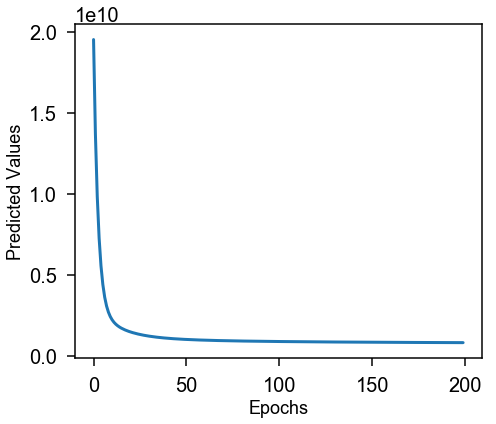

In [14]:
plt.figure(figsize=(7,6))
plt.plot(j)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Predicted Values", fontsize=18)

In [15]:
r2_score(y_train, y_pred) # The outcome of this will be negative as y_pred here is composed of zeros not the lin_reg values

-5.123819148275278

Try changing your value of learning rate and running the above again


Now let's build vectorized implementations. The underlying logic of these functions is no different but they will be much more efficient, which you can observe by how long they take to run. 

In [16]:
def forward_pass_vectorized(X, w, b):
    return np.dot(X, w.T) + b #Fill in here... hint: use np.dot for multiplication
    
def calc_error_vectorized(y_pred, y):
    m = y.shape[0]
    return np.divide(sum(np.square(y_pred - y)), 2*m) #fill in error here... (hint: np.square)

def gradient_descent_vectorized(y, y_pred, X, w, learning_rate, b):
    dj_dw = np.divide(sum(np.dot((y_pred - y), X)), X.shape[1]) #Fill in here 
    dj_db = np.divide(sum(y_pred - y), X.shape[1]) #Fill in
    w_new = w - (learning_rate * dj_dw) #Fill in update rule
    b_new = b - (learning_rate * dj_db) #Fill in update rule
    return w_new, b_new
    
def lin_reg_vectorized(y, X, epochs, learning_rate):
    w = np.zeros((X.shape[1],))
    j = np.zeros((epochs, 1))
    b = 0
    for i in range(epochs):
        y_pred = forward_pass_vectorized(X, w, b) #Call helper method
        j[i] = calc_error_vectorized(y_pred, y) #Call helper method
        w, b = gradient_descent_vectorized(y, y_pred, X, w, learning_rate, b) #Call helper method
    print(r2_score(y, y_pred)) # check our r2_score after the last epoch - Jaime
    return j, w, b
        
j, w, b = lin_reg_vectorized(y_train.values, X_train.values, 1000, .0001) 

0.42417040230609293


Text(0,0.5,'Predicted Values')

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


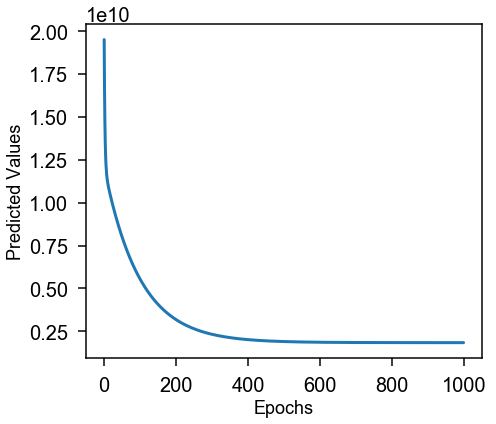

In [17]:
plt.figure(figsize=(7,6))
plt.plot(j)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Predicted Values", fontsize=18)

Try increasing and decreasing your learning rate by 10x. What happens? By trial and error, find an order of magnitude of the learning rate that seems appropriate, balancing speed of convergence while not overshooting.

Optimal learning rate is around: **.0001**

When learning rate is too big what happens: **There's no convergence that occurs**

Now use your new vectorized linear regression model to make predictions on the test set

In [24]:
j, w, b = lin_reg_vectorized(y_test.values, X_test.values, 10000, .0001) 

0.3892138325796709


Text(0,0.5,'Predicted Values')

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


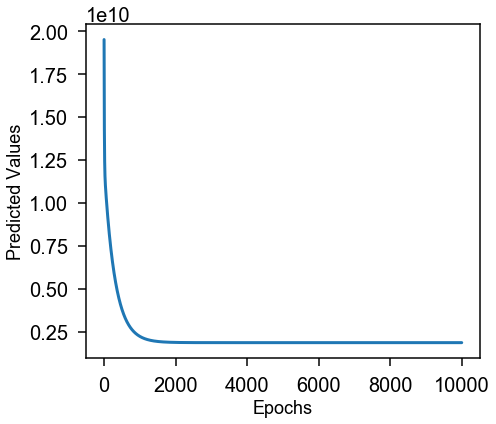

In [25]:
plt.figure(figsize=(7,6))
plt.plot(j)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Predicted Values", fontsize=18)

It's often a good idea to pick some individual houses and sure everything makes sense. Below, pick one or more houses at random (you can pick them yourself, you don't have to actually build a randomized implementation), look at there features, and calculate the predicted sale price for each of them and compare it to actual sale price. See if you can build any intuition for what you could improve in the model this way. 

In [26]:
j, w, b = lin_reg_vectorized(y_train.values, X_train.values, 1000000, .000001) 
y_pred = forward_pass_vectorized(X_train.values[150:166], w, b) # uses the new w and b after our using lin_reg_vectorized

0.424296179086163


Text(0,0.5,'True Values (in 100K Dollars)')

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


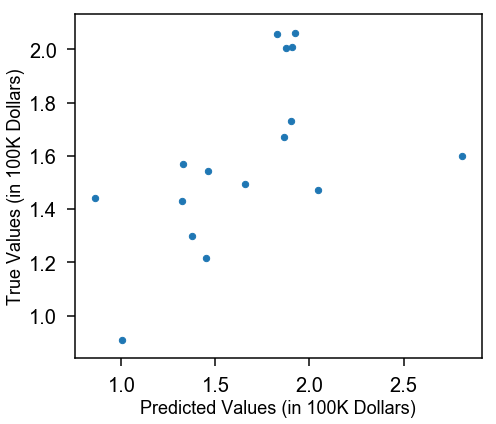

In [27]:
plt.figure(figsize=(7,6))
plt.scatter(y_pred/1E5, y_train.values[150:166]/1E5, s=40)
plt.xlabel("Predicted Values (in 100K Dollars)", fontsize=18)
plt.ylabel("True Values (in 100K Dollars)", fontsize=18)

/Users/jguevara/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


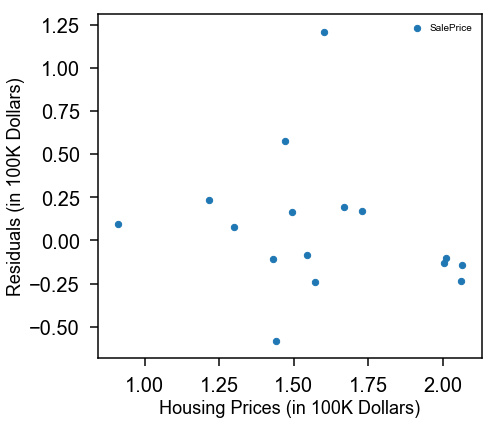

In [28]:
# Check the residuals 
plt.figure(figsize=(7,6))
plt.scatter(y_train.values[150:166]/1E5, (y_pred - y_train[150:166])/1E5, s=40)
plt.xlabel("Housing Prices (in 100K Dollars)", fontsize=18)
plt.ylabel("Residuals (in 100K Dollars)", fontsize=18)
plt.legend()

This part is not graded... but I highly encourage you to play around with this workbook some more and make sure you understand what is happening. Mess with learning rates and see what the impact is... Try changing the number of iterations you run for and see if you can get better results. Compare your the results of your linear regression model with the scikit learn implementation. 

Any feedback?

#### After taking the time to think about some of these functions and how they work it has started to make more sense in a broader more high-level sense (like why we do this, and what it's trying to achieve). However, I feel I still need both more practice in class and outside of class in  order to properly understand the intricacies of the functions themselves, like why/how they're put together, and how exactly they achieve the results we get.<br/>


I also feel that by playing with the functions I've come to understand a little of how epochs and the learning rate interact, for example the more epochs we run the more accurate it gets, but there comes a time where the learning_rate needs to be adjusted accordingly so the results produced can continue to be accurate. However, there also comes a time where the number of epochs run becomes more expensive and tweaking of the learning_rate doesn't do much to improve the accuracy of the results.